In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [2]:
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

In [3]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [6]:
chessGames = pd.read_csv('Datasets/assignment4.csv', sep=',')
chess_train, chess_test = train_test_split(chessGames, test_size=0.3, stratify=chessGames['rated'])
print(chess_train.shape, chess_test.shape)

(14040, 16) (6018, 16)


In [24]:
features = ['rated', 'turns', 'white_rating', 'black_rating']
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(chess_train[features], chess_train['victory_status'])

DecisionTreeClassifier(max_depth=10)

In [25]:
predictionsOnTrainset = dt.predict(chess_train[features])
predictionsOnTestset = dt.predict(chess_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, chess_train.victory_status)
accuracyTest = calculate_accuracy(predictionsOnTestset, chess_test.victory_status)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6467236467236467
Accuracy on test set 0.5603190428713859


The decision tree algorithm is able to predict with an accuracy of 64.7% when tested on the data which was used to train it.
However, when the other 30% of the data, the test data, is used, the accuracy drops to 56.0%, which is a significant drop.

This is likely because this data was not yet seen by the algorithm, whereas the training data obviously was.

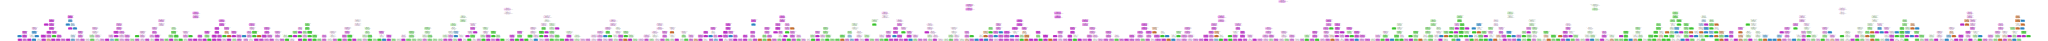

In [13]:
plot_tree_classification(dt, features, chessGames.victory_status.unique())

The core concept of the decision tree is understandable. However, the tree itself is so big, that it is quite difficult to oversee it as a whole.

It is clear that the algorithm keeps making a decision node if it hasn't yet reached its max depth, and the samples don't all have the same result at the current node. It tries to pick a decision that devides the samples in a way that splits the result (e.g: only draws on one side, only mates on the other), the algorithm keeps doing this, until the whole sample belongs to a single class (one result, draw for example), or until max depth of the desicion tree is reached.

The result of a given node, is given by the class that is most abundant in its sample.